<a href="https://colab.research.google.com/github/lathifshaik/Anomoly-Detection-in-NYC-taxi-demand/blob/main/Anomoly_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import pandas as pd
import plotly.express as px

from sklearn.ensemble import IsolationForest

mpl.rcParams['figure.figsize'] = (10,8)
mpl.rcParams['axes.grid'] = False


In [ ]:
df = pd.read_csv("nyc_taxi.csv")

In [ ]:
df


,timestamp,value
0,2014-07-01 00:00:00,10844
1,2014-07-01 00:30:00,8127
2,2014-07-01 01:00:00,6210
3,2014-07-01 01:30:00,4656
4,2014-07-01 02:00:00,3820
...,...,...
10315,2015-01-31 21:30:00,24670
10316,2015-01-31 22:00:00,25721
10317,2015-01-31 22:30:00,27309
10318,2015-01-31 23:00:00,26591


In [ ]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10320 entries, 0 to 10319
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  10320 non-null  datetime64[ns]
 1   value      10320 non-null  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 161.4 KB


In [ ]:
df.head()

,timestamp,value
0,2014-07-01 00:00:00,10844
1,2014-07-01 00:30:00,8127
2,2014-07-01 01:00:00,6210
3,2014-07-01 01:30:00,4656
4,2014-07-01 02:00:00,3820


In [ ]:
df = df.set_index('timestamp').resample('H').mean().reset_index()

In [ ]:
df

,timestamp,value
0,2014-07-01 00:00:00,9485.5
1,2014-07-01 01:00:00,5433.0
2,2014-07-01 02:00:00,3346.5
3,2014-07-01 03:00:00,2216.5
4,2014-07-01 04:00:00,2189.5
...,...,...
5155,2015-01-31 19:00:00,28288.5
5156,2015-01-31 20:00:00,24138.0
5157,2015-01-31 21:00:00,24194.5
5158,2015-01-31 22:00:00,26515.0


In [ ]:
df['hour'] = df.timestamp.dt.hour

In [ ]:
df['weekday'] = pd.Categorical(df.timestamp.dt.strftime('%A'), categories=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'], ordered=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5160 entries, 0 to 5159
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  5160 non-null   datetime64[ns]
 1   value      5160 non-null   float64       
 2   hour       5160 non-null   int64         
 3   weekday    5160 non-null   category      
dtypes: category(1), datetime64[ns](1), float64(1), int64(1)
memory usage: 126.4 KB


<Axes: xlabel='weekday'>

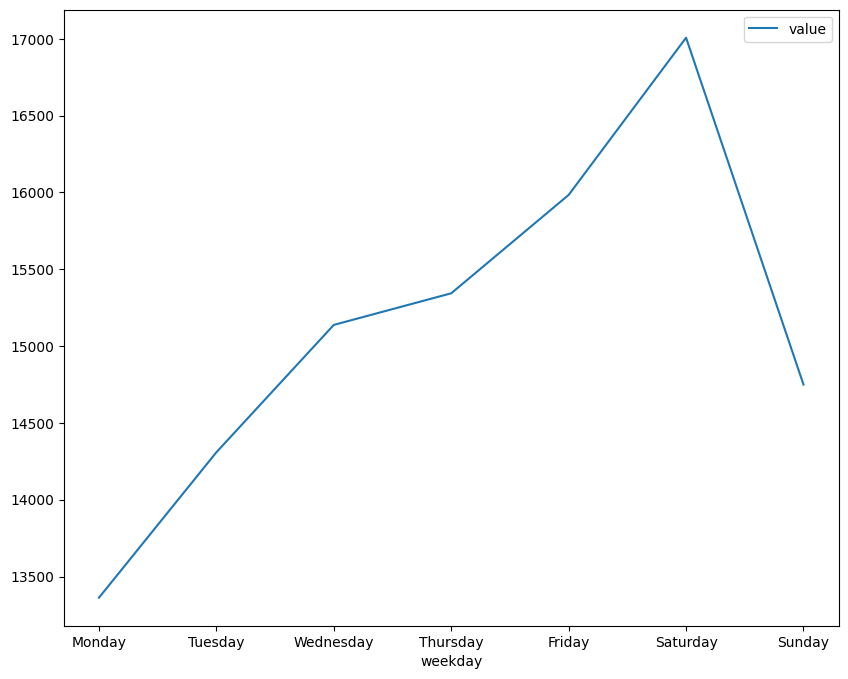

In [ ]:
df[['value','weekday']].groupby('weekday').mean().plot()

<Axes: xlabel='hour'>

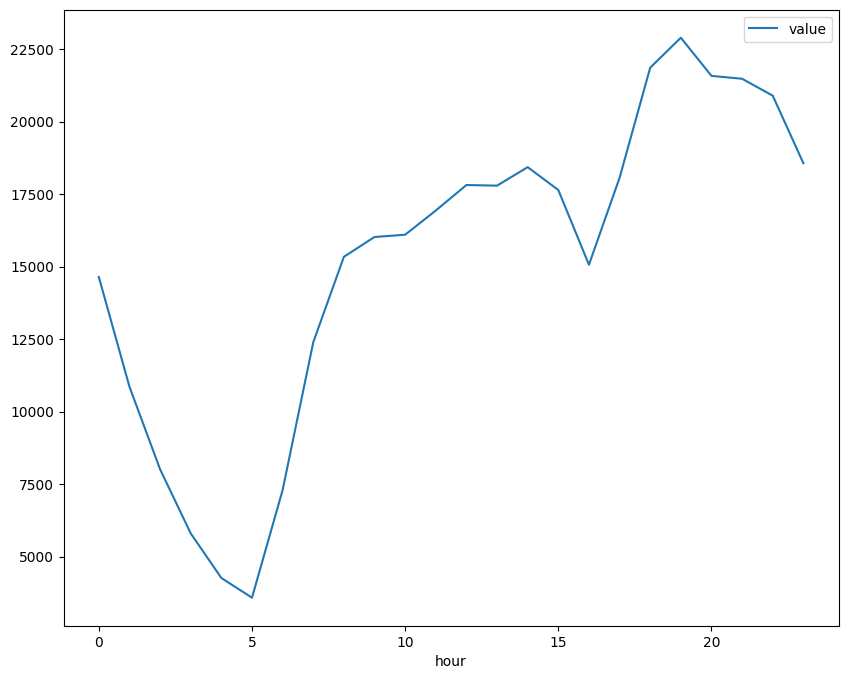

In [ ]:
df[['value','hour']].groupby('hour').mean().plot()

In [ ]:
fig = px.line(df.reset_index(), x ='timestamp', y ='value', title='NYC Taxi Demand')

fig.update_xaxes(
    rangeslider_visible=True,

)
fig.show()

In [ ]:
model = IsolationForest(contamination=0.05)
model.fit(df[['value']])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but IsolationForest was fitted with feature names



IsolationForest(contamination=0.05)

In [ ]:
df['outliners'] = pd.Series(model.predict(df[['value']])).apply(lambda x : 'yes' if (x == -1) else 'no')

In [ ]:
df.query('outliners=="yes"')

,timestamp,value,hour,weekday,outliners
25,2014-07-02 01:00:00,6744.0,1,Wednesday,yes
147,2014-07-07 03:00:00,1910.5,3,Monday,yes
171,2014-07-08 03:00:00,2001.0,3,Tuesday,yes
172,2014-07-08 04:00:00,2074.5,4,Tuesday,yes
193,2014-07-09 01:00:00,6634.0,1,Wednesday,yes
...,...,...,...,...,...
5143,2015-01-31 07:00:00,5926.0,7,Saturday,yes
5154,2015-01-31 18:00:00,26665.0,18,Saturday,yes
5155,2015-01-31 19:00:00,28288.5,19,Saturday,yes
5158,2015-01-31 22:00:00,26515.0,22,Saturday,yes


In [ ]:
fig = px.scatter(df.reset_index(), x= 'timestamp', y='value',color = 'outliners', hover_data=['weekday'], title='NYC Taxi Demand')

fig.update_xaxes(
    rangeslider_visible=True,
)
fig.show()

In [ ]:
model = IsolationForest()
model.fit(df[['value']])


IsolationForest()

In [ ]:
score = model.decision_function(df[['value']])

In [ ]:
score

array([-0.01800333, -0.04302593, -0.01882162, ..., -0.02667683,
       -0.11544175, -0.10715541])

(array([  1.,   2.,   0.,   6.,   7.,   3.,   1.,   2.,   4.,   7.,   5.,
          3.,   9.,   5.,   7.,  14.,  11.,  12.,  16.,  23.,  27.,  20.,
         11.,  25.,  21.,  29.,  61., 140., 195., 190., 198., 314., 217.,
        295., 320., 382., 317., 150.,  44.,  69., 107., 117., 325., 231.,
         82., 137., 220., 266., 384., 128.]),
 array([-0.23003077, -0.22389055, -0.21775033, -0.21161012, -0.2054699 ,
        -0.19932968, -0.19318947, -0.18704925, -0.18090904, -0.17476882,
        -0.1686286 , -0.16248839, -0.15634817, -0.15020795, -0.14406774,
        -0.13792752, -0.1317873 , -0.12564709, -0.11950687, -0.11336665,
        -0.10722644, -0.10108622, -0.094946  , -0.08880579, -0.08266557,
        -0.07652536, -0.07038514, -0.06424492, -0.05810471, -0.05196449,
        -0.04582427, -0.03968406, -0.03354384, -0.02740362, -0.02126341,
        -0.01512319, -0.00898297, -0.00284276,  0.00329746,  0.00943767,
         0.01557789,  0.02171811,  0.02785832,  0.03399854,  0.04013876,
 

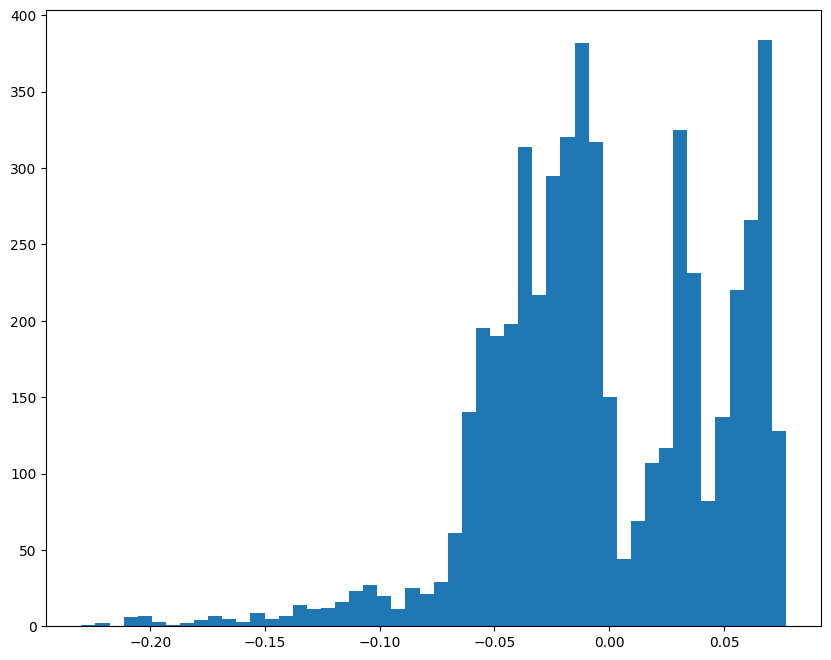

In [ ]:
plt.hist(score, bins=50)

In [ ]:
df['score'] = score

In [ ]:
df.query('score<-0.15')

,timestamp,value,hour,weekday,outliners,score
1515,2014-09-02 03:00:00,1653.5,3,Tuesday,yes,-0.153663
1603,2014-09-05 19:00:00,27074.5,19,Friday,yes,-0.153827
1630,2014-09-06 22:00:00,27414.0,22,Saturday,yes,-0.170738
1631,2014-09-06 23:00:00,29418.5,23,Saturday,yes,-0.220219
1775,2014-09-12 23:00:00,27331.5,23,Friday,yes,-0.165974
1799,2014-09-13 23:00:00,27078.5,23,Saturday,yes,-0.154712
1942,2014-09-19 22:00:00,27385.5,22,Friday,yes,-0.168831
2135,2014-09-27 23:00:00,28024.5,23,Saturday,yes,-0.198259
2471,2014-10-11 23:00:00,27117.5,23,Saturday,yes,-0.155599
2635,2014-10-18 19:00:00,27341.0,19,Saturday,yes,-0.169284
